# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

D:\HKUST\COMP 4901J\WinPython-64bit-3.5.3.1Qt5\notebooks\assignment1\cs231n\features.py:121: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy].T


Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [22]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [2.7e-7, 3.3e-7]
regularization_strengths = [0.7e4, 1.3e4]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for alpha in learning_rates:
    for lambd in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, learning_rate=alpha, reg=lambd,
                      num_iters=1500, verbose=True)
        
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy = np.mean(y_val == y_val_pred)
        
        results[(alpha, lambd)] = (train_accuracy, val_accuracy)
        
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 19.847291
iteration 100 / 1500: loss 14.095423
iteration 200 / 1500: loss 11.376533
iteration 300 / 1500: loss 10.118088
iteration 400 / 1500: loss 9.521804
iteration 500 / 1500: loss 9.244269
iteration 600 / 1500: loss 9.113838
iteration 700 / 1500: loss 9.051825
iteration 800 / 1500: loss 9.023123
iteration 900 / 1500: loss 9.009536
iteration 1000 / 1500: loss 9.003572
iteration 1100 / 1500: loss 8.999470
iteration 1200 / 1500: loss 8.998991
iteration 1300 / 1500: loss 8.998007
iteration 1400 / 1500: loss 8.997529
iteration 0 / 1500: loss 30.468316
iteration 100 / 1500: loss 14.240783
iteration 200 / 1500: loss 10.276914
iteration 300 / 1500: loss 9.313253
iteration 400 / 1500: loss 9.073774
iteration 500 / 1500: loss 9.017033
iteration 600 / 1500: loss 9.003054
iteration 700 / 1500: loss 8.999838
iteration 800 / 1500: loss 8.999123
iteration 900 / 1500: loss 8.998839
iteration 1000 / 1500: loss 8.998624
iteration 1100 / 1500: loss 8.998662
iteration 1200 / 1

In [23]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.425


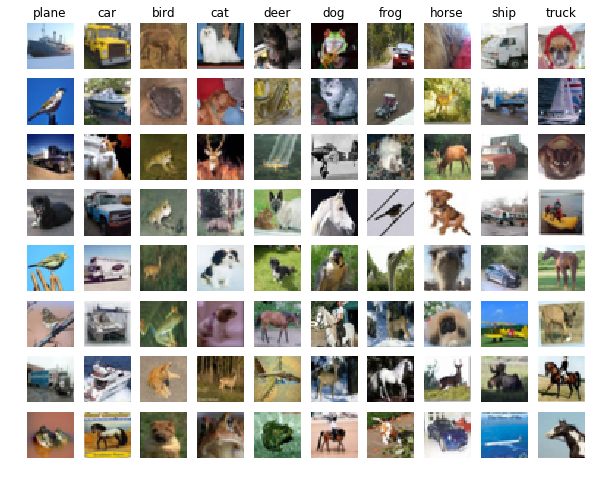

In [24]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

Answer: *They do make sense. Many of the misclassification results are due to the data having similar texture or color to the predicted class. This may be due to the training data not being good enough (e.g. not having image of the class taken at different angle, size, etc).*

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [25]:
print(X_train_feats.shape)

(49000, 155)


In [89]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
best_val = -1
learning_rates = [7e-2, 9e-2, 1e-1]
regularization_strengths = [9e-8, 1e-7, 7e-7]
results = {}

for alpha in learning_rates:
    for lambd in regularization_strengths:
        net.train(X_train_feats, y_train, X_val_feats, y_val,
                 learning_rate=alpha, learning_rate_decay=0.9, reg=lambd,
                 num_iters=1500, batch_size=256, verbose=True)

        y_train_pred = net.predict(X_train_feats)
        y_val_pred = net.predict(X_val_feats)

        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy = np.mean(y_val == y_val_pred)

        results[(alpha, lambd)] = (train_accuracy, val_accuracy)

        if val_accuracy > best_val:
            best_val = val_accuracy
            best_net = net
            
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302575
iteration 200 / 1500: loss 2.295472
iteration 300 / 1500: loss 2.072580
iteration 400 / 1500: loss 1.767882
iteration 500 / 1500: loss 1.704590
iteration 600 / 1500: loss 1.616421
iteration 700 / 1500: loss 1.533064
iteration 800 / 1500: loss 1.405851
iteration 900 / 1500: loss 1.390925
iteration 1000 / 1500: loss 1.404561
iteration 1100 / 1500: loss 1.388261
iteration 1200 / 1500: loss 1.469356
iteration 1300 / 1500: loss 1.250074
iteration 1400 / 1500: loss 1.269856
iteration 0 / 1500: loss 1.317271
iteration 100 / 1500: loss 1.402703
iteration 200 / 1500: loss 1.310826
iteration 300 / 1500: loss 1.264746
iteration 400 / 1500: loss 1.227812
iteration 500 / 1500: loss 1.262588
iteration 600 / 1500: loss 1.272398
iteration 700 / 1500: loss 1.418413
iteration 800 / 1500: loss 1.297222
iteration 900 / 1500: loss 1.279816
iteration 1000 / 1500: loss 1.302217
iteration 1100 / 1500: loss 1.272991
iteration 1200 / 1500: lo

In [91]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.502


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

# Confusion Matrix
I want to visualize how many true positives, true negatives, false positives, and false negatives that the Neural Network model made.

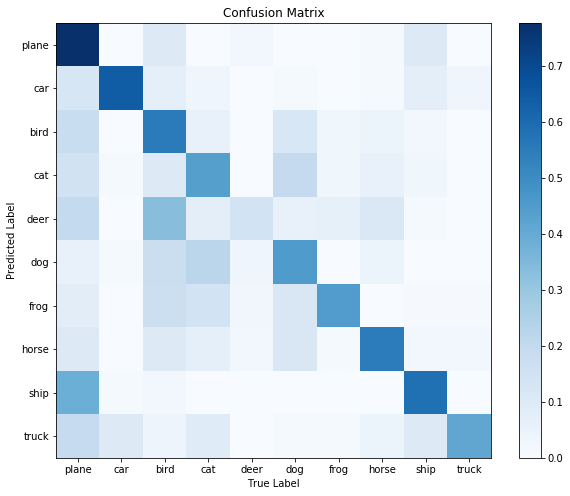

In [101]:
from sklearn.metrics import confusion_matrix

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_test_ped = net.predict(X_test_feats)
cm = confusion_matrix(y_test, y_test_ped)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# F1 Score
Sometimes accuracy may not be a reliable metric to determine the performance of the model as it could be misleadning if the data in the dataset has an uneven class distribution. Hence, f1 score would be a better metric in that case.

To test out the idea, the Neural Network model is implemented again but using F1 score as a metric to choose from different models to see if the idea applies in our model.

In [110]:
from cs231n.classifiers.neural_net import TwoLayerNet
from sklearn.metrics import f1_score

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
best_val = -1
learning_rates = [7e-2, 9e-2, 1e-1]
regularization_strengths = [9e-8, 1e-7, 7e-7]
results = {}

for alpha in learning_rates:
    for lambd in regularization_strengths:
        net.train(X_train_feats, y_train, X_val_feats, y_val,
                 learning_rate=alpha, learning_rate_decay=0.9, reg=lambd,
                 num_iters=1500, batch_size=256, verbose=True)

        y_train_pred = net.predict(X_train_feats)
        y_val_pred = net.predict(X_val_feats)

        train_f1_score = f1_score(y_train, y_train_pred, average='micro')
        val_f1_score = f1_score(y_val, y_val_pred, average='micro')

        results[(alpha, lambd)] = (train_f1_score, val_f1_score)

        if val_f1_score > best_val:
            best_val = val_f1_score
            best_net = net
            
# Print out results.
for lr, reg in sorted(results):
    train_f1_score, val_f1_score = results[(lr, reg)]
    print('lr %e reg %e train f1 score: %f val f1 score: %f' % (
                lr, reg, train_f1_score, val_f1_score))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302840
iteration 200 / 1500: loss 2.297016
iteration 300 / 1500: loss 2.134437
iteration 400 / 1500: loss 1.870532
iteration 500 / 1500: loss 1.670582
iteration 600 / 1500: loss 1.450243
iteration 700 / 1500: loss 1.612699
iteration 800 / 1500: loss 1.404534
iteration 900 / 1500: loss 1.348979
iteration 1000 / 1500: loss 1.366259
iteration 1100 / 1500: loss 1.374686
iteration 1200 / 1500: loss 1.390032
iteration 1300 / 1500: loss 1.267292
iteration 1400 / 1500: loss 1.300626
iteration 0 / 1500: loss 1.395474
iteration 100 / 1500: loss 1.223026
iteration 200 / 1500: loss 1.345935
iteration 300 / 1500: loss 1.363557
iteration 400 / 1500: loss 1.226979
iteration 500 / 1500: loss 1.256798
iteration 600 / 1500: loss 1.222454
iteration 700 / 1500: loss 1.277584
iteration 800 / 1500: loss 1.189321
iteration 900 / 1500: loss 1.455984
iteration 1000 / 1500: loss 1.239246
iteration 1100 / 1500: loss 1.273485
iteration 1200 / 1500: lo

In [111]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_f1_score = f1_score(y_test, net.predict(X_test_feats), average='micro')
print(test_f1_score)

0.515
